In [14]:
import numpy as np
import scipy as sp
from scipy.sparse.linalg import expm
import matplotlib.pyplot as plt
import expsolve.fourier as fe

import torch
from torch import real, sin, pi, abs, exp, imag, matrix_exp

# The Grid

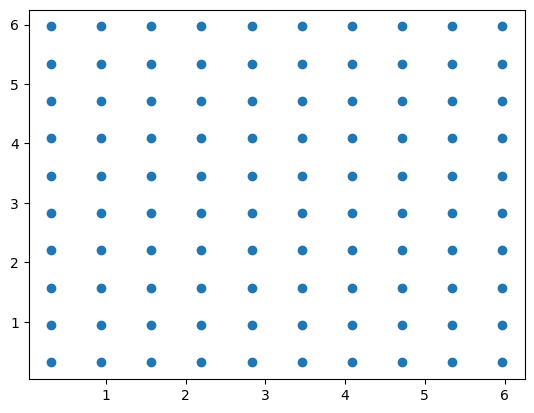

In [15]:
xrange = [0, 2*np.pi]
[x,y] = fe.grid([10,10], xrange)
plt.scatter(x,y)
plt.show()

# Testing differentiation

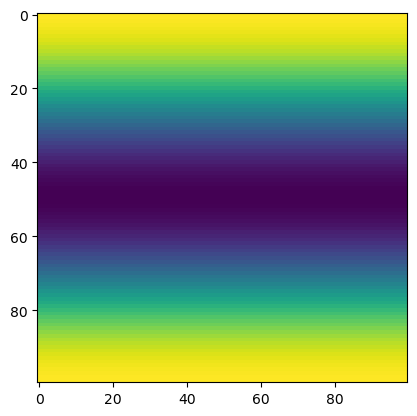

In [16]:
xrange = [0, 2*pi]
n = 100
[x,y] = fe.grid([n,n], xrange)
s = sin(x)
ds = fe.diffop(0,1,s,xrange)   
d2s = fe.diffop(0,2,s,xrange)  

plt.imshow(real(ds))
plt.show()

# Solving the Schrödinger equation

2D Grid

In [17]:
n = [100,100]
xr = [-10, 10]
[x,y] = fe.grid(n, xr)

Initial Condition

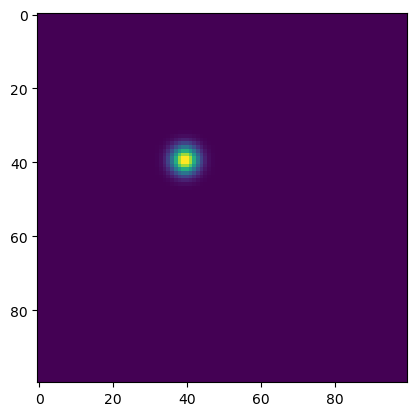

In [19]:
x0 = -2.0
y0 = -2.0
u = exp(-((x-x0)**2+(y-y0)**2)/(2*0.25)).type(torch.complex128)

plt.imshow(abs(u))
plt.show()

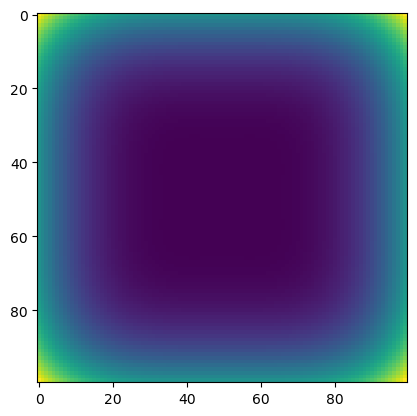

In [20]:
V = x**4 + y**4 - 5*x**2 - 5*y**2
plt.imshow(V)
plt.show()

### Single step of Strang

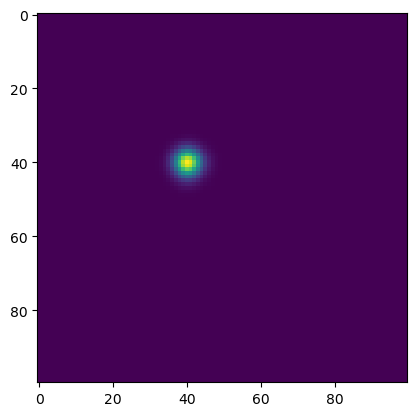

In [21]:
eL1u = lambda h, u: fe.diffopexp(0, 2, 1j*h, u, xr) 
eL2u = lambda h, u: fe.diffopexp(1, 2, 1j*h, u, xr)
eLu = lambda h, u: eL1u(h, eL2u(h, u))

eVu = lambda h, u: exp(-1j*h*V)*u
strang = lambda h, u: eVu(h/2, eLu(h, eVu(h/2, u)))


dt = 0.1

ustrang = strang(dt, u)

plt.imshow(abs(ustrang))
plt.show()

### Full run of Strang

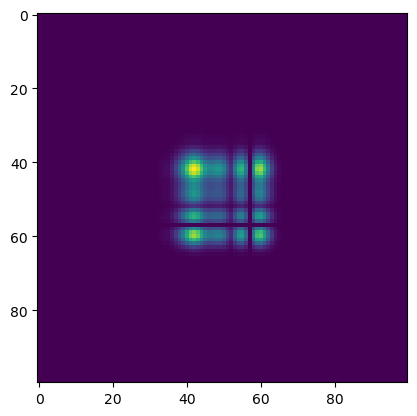

In [22]:
def runstrang(T, N, u0):
    u = u0
    h = T/N
    for i in range(N):
        u = strang(h, u)
    return u

T = 1

ustrangT = runstrang(T,1000,u)
plt.imshow(abs(ustrangT))
plt.show()